In [104]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import seaborn as sns

In [105]:
earthquake_df = pd.read_csv('../data/Earthquakes/earthquakes.csv')

In [106]:
# first look at DataFrame head
earthquake_df.head()

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
0,usp000gyu4,39.644,-75.483,5000,NEIC,md,2.8,New Jersey,2009-07-01T13:44:43.380Z,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,NEIC,mblg,2.8,West Virginia,2009-07-04T12:24:43.460Z,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,NEIC,md,2.1,"southern Quebec, Canada",2009-07-08T10:22:11.430Z,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,NEIC,md,2.4,New York,2009-09-23T03:45:59.900Z,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,NEIC,mblg,3.4,West Virginia,2010-04-04T09:19:14.000Z,2010/04/04 05:19:14-04,0,0


In [107]:
# first look at DataFrame tail
earthquake_df.tail()

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
1642,5110375,37.9496,-81.3663,9500,ANF,ML,2.3,WEST VIRGINIA,2014-11-14T20:53:10,2014/11/14 15:53:10-05,1,1
1643,5110460,41.4521,-77.3709,11100,ANF,ML,2.1,PENNSYLVANIA,2014-11-25T16:26:59,2014/11/25 11:26:59-05,1,1
1644,5110483,41.0997,-78.3670,3100,ANF,ML,2.1,PENNSYLVANIA,2014-11-28T16:14:11,2014/11/28 11:14:11-05,1,1
1645,5109389,43.7508,-74.1109,17000,ANF,ML,2.2,NEW YORK,2014-12-16T17:58:29,2014/12/16 12:58:29-05,1,1
1646,5111627,42.4991,-73.8542,18900,ANF,ML,2.2,NEW YORK,2015-01-02T18:08:29,2015/01/02 13:08:29-05,1,1


In [108]:
# DataFrame shape
earthquake_df.shape

(1647, 12)

DataFrame has:
1,647 rows
12 columns

In [109]:
# list of DataFrame column names
earthquake_df.columns

Index(['_EventID_', '_Latitude_', '_Longitude_', '_DepthMeters_',
       '_Contributor_', '_MagType_', '_Magnitude_', '_EventLocationName_',
       '_Time_', 'ts', 'potential_blast', 'bix_potential_blasts'],
      dtype='object')

In [110]:
# rename columns
earthquake_df.rename(columns = {
    '_EventID_' : 'Event ID',
    '_Latitude_' : 'Latitude',
    '_Longitude_' : 'Longitude',
    '_DepthMeters_' : 'Depth (meters)',
    '_Contributor_' : 'Contributor',
    '_MagType_' : 'Magnitude Type',
    '_Magnitude_' : 'Magnitude',
    '_EventLocationName_' : 'Event Location',
    '_Time_' : 'Time',
    'ts' : 'Time Series',
    'potential_blast' : 'Natural Earthquake',
    'bix_potential_blasts' : 'Bix Potential Blasts'
}, inplace=True)

In [111]:
earthquake_df.head()

,Event ID,Latitude,Longitude,Depth (meters),Contributor,Magnitude Type,Magnitude,Event Location,Time,Time Series,Natural Earthquake,Bix Potential Blasts
0,usp000gyu4,39.644,-75.483,5000,NEIC,md,2.8,New Jersey,2009-07-01T13:44:43.380Z,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,NEIC,mblg,2.8,West Virginia,2009-07-04T12:24:43.460Z,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,NEIC,md,2.1,"southern Quebec, Canada",2009-07-08T10:22:11.430Z,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,NEIC,md,2.4,New York,2009-09-23T03:45:59.900Z,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,NEIC,mblg,3.4,West Virginia,2010-04-04T09:19:14.000Z,2010/04/04 05:19:14-04,0,0


In [112]:
# DataFrame info
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event ID              1647 non-null   object 
 1   Latitude              1647 non-null   float64
 2   Longitude             1647 non-null   float64
 3   Depth (meters)        1647 non-null   int64  
 4   Contributor           1647 non-null   object 
 5   Magnitude Type        1628 non-null   object 
 6   Magnitude             1647 non-null   float64
 7   Event Location        1647 non-null   object 
 8   Time                  1647 non-null   object 
 9   Time Series           1647 non-null   object 
 10  Natural Earthquake    1647 non-null   int64  
 11  Bix Potential Blasts  1647 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 154.5+ KB


In [113]:
# Check for duplicate rows
earthquake_df.duplicated().sum()

np.int64(0)

In [114]:
# Identify datatypes
earthquake_df.dtypes

Event ID                 object
Latitude                float64
Longitude               float64
Depth (meters)            int64
Contributor              object
Magnitude Type           object
Magnitude               float64
Event Location           object
Time                     object
Time Series              object
Natural Earthquake        int64
Bix Potential Blasts      int64
dtype: object

In [115]:
# Split Time to Date and Time 
earthquake_df[['Date', 'Time']] = earthquake_df['Time'].str.split('T', expand=True)


In [116]:
# Move Date column
column_to_move = earthquake_df.pop('Date')
earthquake_df.insert(8, 'Date', column_to_move)

In [117]:
# Modify data type for Date column 

earthquake_df['Date'] = pd.to_datetime(earthquake_df['Date'])

earthquake_df['Time'] = pd.to_datetime(earthquake_df['Time'], utc=True)


C:\Users\julie\AppData\Local\Temp\ipykernel_10556\1072939532.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earthquake_df['Time'] = pd.to_datetime(earthquake_df['Time'], utc=True)


In [118]:
earthquake_df.dtypes


Event ID                             object
Latitude                            float64
Longitude                           float64
Depth (meters)                        int64
Contributor                          object
Magnitude Type                       object
Magnitude                           float64
Event Location                       object
Date                         datetime64[ns]
Time                    datetime64[ns, UTC]
Time Series                          object
Natural Earthquake                    int64
Bix Potential Blasts                  int64
dtype: object

In [119]:
# Split Month and Year from Date column
earthquake_df['Month'] = earthquake_df['Date'].dt.month
earthquake_df['Year'] = earthquake_df['Date'].dt.year

In [120]:
# Move Month and Year Columns next to Date
column_move_1 = earthquake_df.pop('Month')
earthquake_df.insert(9, 'Month', column_move_1)

column_move_2 = earthquake_df.pop('Year')
earthquake_df.insert(10, 'Year', column_move_2)

In [121]:
earthquake_df.head()

,Event ID,Latitude,Longitude,Depth (meters),Contributor,Magnitude Type,Magnitude,Event Location,Date,Month,Year,Time,Time Series,Natural Earthquake,Bix Potential Blasts
0,usp000gyu4,39.644,-75.483,5000,NEIC,md,2.8,New Jersey,2009-07-01,7,2009,2025-09-16 13:44:43.380000+00:00,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,NEIC,mblg,2.8,West Virginia,2009-07-04,7,2009,2025-09-16 12:24:43.460000+00:00,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,NEIC,md,2.1,"southern Quebec, Canada",2009-07-08,7,2009,2025-09-16 10:22:11.430000+00:00,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,NEIC,md,2.4,New York,2009-09-23,9,2009,2025-09-16 03:45:59.900000+00:00,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,NEIC,mblg,3.4,West Virginia,2010-04-04,4,2010,2025-09-16 09:19:14+00:00,2010/04/04 05:19:14-04,0,0


In [122]:
# Identify missing values
earthquake_df.isnull().sum()

Event ID                 0
Latitude                 0
Longitude                0
Depth (meters)           0
Contributor              0
Magnitude Type          19
Magnitude                0
Event Location           0
Date                     0
Month                    0
Year                     0
Time                     0
Time Series              0
Natural Earthquake       0
Bix Potential Blasts     0
dtype: int64

19 missing values under Magnitude_Type

In [123]:
# Fill missing values with "Unknown"
earthquake_df. fillna({'Magnitude Type': 'Unknown'}, inplace=True)

In [124]:
# Re-check for missing values
earthquake_df.isnull().sum()

Event ID                0
Latitude                0
Longitude               0
Depth (meters)          0
Contributor             0
Magnitude Type          0
Magnitude               0
Event Location          0
Date                    0
Month                   0
Year                    0
Time                    0
Time Series             0
Natural Earthquake      0
Bix Potential Blasts    0
dtype: int64

In [125]:
# statistical data of DataFrame
earthquake_df.describe()

,Latitude,Longitude,Depth (meters),Magnitude,Date,Month,Year,Natural Earthquake,Bix Potential Blasts
count,1647.000000,1647.000000,1647.000000,1647.000000,1647,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7561.554341,2.375823,2011-03-25 06:55:18.032786944,6.184578,2010.756527,0.621129,0.746812
min,37.007700,-82.881000,100.000000,0.000000,1973-02-28 00:00:00,1.000000,1973.000000,0.000000,0.000000
25%,37.902400,-81.694150,3450.000000,2.100000,2013-01-18 00:00:00,3.000000,2013.000000,0.000000,0.000000
50%,38.477800,-80.831400,6400.000000,2.400000,2013-09-06 00:00:00,6.000000,2013.000000,1.000000,1.000000
75%,41.467200,-75.934050,11500.000000,2.600000,2014-07-08 00:00:00,9.000000,2014.000000,1.000000,1.000000
max,45.300900,-73.063400,32300.000000,5.200000,2015-08-22 00:00:00,12.000000,2015.000000,1.000000,1.000000
std,2.410973,3.192442,5206.616854,0.454489,NaN,3.384251,7.868889,0.485253,0.434970


In [126]:
# value counts for categories
locations = earthquake_df['Event Location'].value_counts()
pd.set_option('display.max_rows', None)
print(locations)

Event Location
WEST VIRGINIA                                   842
NEW YORK                                        189
PENNSYLVANIA                                    172
New York                                        119
Pennsylvania                                     55
West Virginia                                    23
VIRGINIA                                         22
Ontario-Quebec border region, Canada             16
Ohio                                             14
New Jersey                                       12
Greater New York area, New Jersey                11
NEW JERSEY                                       10
SOUTHERN QUEBEC, CANADA                          10
OHIO                                              9
southern Quebec, Canada                           8
CHESAPEAKE BAY REGION                             7
Greater Philadelphia area, New Jersey             6
Youngstown-Akron urban area, Ohio                 6
Virginia                                         

In [127]:
# Complile locations into states

# New Jersey
pattern_1 = '|'.join(["New Jersey", "NEW JERSEY","Greater New York area, New Jersey","Greater Philadelphia area, New Jersey",
    "1km SSW of Clifton, New Jersey", "5km N of Boonton, New Jersey", "3km WSW of Jersey City, New Jersey","0km SW of Lindenwold, New Jersey",
    "1km NNE of Hillsdale, New Jersey","1km N of Wanaque, New Jersey","2km WNW of Fairfield, New Jersey","8km W of Vista Center, New Jersey",
    "4km SW of Ringwood, New Jersey"
    ])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_1, 'New Jersey', regex=True)

# New York
pattern_2 = '|'.join(["New York", "NEW YORK", "41km S of Lake Placid, New York", "5km SSE of Attica, New York",
    "45km NW of Warrensburg, New York", "21km NNE of Medina, New York","18km WNW of Malone, New York", "15km SW of Altamont, New York",
    "42km NNE of Lake Pleasant, New York", "9km NE of Dundee, New York", "9km NNW of Brownville, New York", "5km NE of Hadley, New York",
    "7km ENE of Massena, New York", "5km SE of Canton, New York", "18km NW of Champlain, New York","9km WNW of Dannemora, New York",
    "26km SE of Malone, New York", "4km W of Altamont, New York","19km N of Alexandria Bay, New York","2km S of Heritage Hills, New York",
    "7km NE of Massena, New York","9km NNE of Medina, New York","21km NW of Warrensburg, New York","6km W of South Lockport, New York",
    "27km NNE of Olcott, New York","7km NNW of Brownville, New York","19km NNW of Youngstown, New York","35km E of Carthage, New York",
    "16km WSW of Peru, New York","8km ENE of Broadalbin, New York","1km ESE of Norwood, New York","25km NNE of Utica, New York",
    "2km ESE of Highland Falls, New York", "4km WSW of Fonda, New York","15km NW of Hadley, New York","32km NW of Warrensburg, New York",
    "39km SE of Tupper Lake, New York","7km SE of Dannemora, New York","12km NNW of Tupper Lake, New York","27km ENE of Carthage, New York",
    "25km N of Olcott, New York","9km NE of Medina, New York","13km W of Norwood, New York","5km S of Lake Erie Beach, New York",
    "21km SSE of Hannawa Falls, New York","1km SW of Rye Brook, New York","11km W of Dannemora, New York","31km NW of Warrensburg, New York",
    "24km WSW of Malone, New York"
    ])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_2, 'New York', regex=True)

# West Virginia
pattern_3 = '|'.join(["West Virginia", "WEST VIRGINIA", "13km SW of Glenville, West Virginia", "12km SSW of Glenville, West Virginia",
    "2km N of Alderson, West Virginia", "14km SW of Glenville, West Virginia","13km NNE of Sissonville, West Virginia",
    "11km WSW of Sutton, West Virginia","10km WNW of Sutton, West Virginia","Potomac-Shenandoah region" 
    ])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_3, 'West Virginia', regex=True)

# Pennsylvania
pattern_4 = '|'.join(["PENNSYLVANIA", "Pennsylvania", "Greater Philadelphia area, Pennsylvania", "2km SE of Guilford Siding, Pennsylvania",
    "1km SSW of Garden View, Pennsylvania", "8km NNE of Greenville, Pennsylvania","2km SE of Conestoga, Pennsylvania",
    "3km WSW of Exton, Pennsylvania","11km NNW of Susquehanna Trails, Pennsylvania"                 
    ])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_4, 'Pennsylvania', regex=True)

# Virginia
pattern_5 = '|'.join(["VIRGINIA", "Virginia","11km E of Bland, Virginia"])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_5, 'Virginia', regex=True)

# Ohio
pattern_6 = '|'.join(["Ohio ", "OHIO", "Lake Erie, Ohio", "Youngstown-Akron urban area, Ohio", "2km S of Lowellville, Ohio", 
    "15km S of Gallipolis, Ohio", "3km SSW of Lowellville, Ohio", "3km S of Lowellville, Ohio","1km WSW of Bolindale, Ohio",
    "2km SSW of Lowellville, Ohio"
    ])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_6, 'Ohio', regex=True)

# Quebec
pattern_7 = '|'.join(["Ontario-Quebec border region, Canada","SOUTHERN QUEBEC, CANADA", "southern Quebec, Canada", "10km ESE of Cornwall, Canada",
    "3km WNW of Huntingdon, Canada","39km SSW of Cobourg, Canada","29km SE of Toronto, Canada","3km SSW of Huntingdon, Canada",
    "6km NNE of Ormstown, Canada","8km SSW of Salaberry-de-Valleyfield, Canada","6km SW of Salaberry-de-Valleyfield, Canada",
    "southern Ontario, Canada","11km S of Sainte-Martine, Canada","4km SW of Huntingdon, Canada","9km E of Ormstown, Canada",
    "8km SSW of Huntingdon, Canada","8km NNW of Huntingdon, Canada","1km W of Ormstown, Canada"
    ])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_7, 'Quebec', regex=True)

# Kentucky
pattern_8 = '|'.join(["eastern Kentucky","7km WSW of Flatwoods, Kentucky","8km S of Greenup, Kentucky"])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_8, 'Kentucky', regex=True)

# Connecticut
pattern_9 = '|'.join(["0km SE of Byram, Connecticut"])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_9, 'Connecticut', regex=True)

# Delaware
pattern_10 = '|'.join(["Wilmington urban area, Delaware"])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_10, 'Delaware', regex=True)

# Maryland
pattern_11 = '|'.join(["CHESAPEAKE BAY REGION","Chesapeake Bay region"])
earthquake_df['Event Location'] = earthquake_df['Event Location'].str.replace(pattern_11, 'Maryland', regex=True)

In [128]:
# Updated location totals
locations = earthquake_df['Event Location'].value_counts()
pd.set_option('display.max_rows', None)
print(locations)

Event Location
West Virginia    874
New York         355
Pennsylvania     237
New Jersey        49
Quebec            49
Ohio              38
Virginia          27
Maryland           9
Kentucky           4
Vermont            3
Connecticut        1
Delaware           1
Name: count, dtype: int64


In [129]:
earthquake_df.head()

,Event ID,Latitude,Longitude,Depth (meters),Contributor,Magnitude Type,Magnitude,Event Location,Date,Month,Year,Time,Time Series,Natural Earthquake,Bix Potential Blasts
0,usp000gyu4,39.644,-75.483,5000,NEIC,md,2.8,New Jersey,2009-07-01,7,2009,2025-09-16 13:44:43.380000+00:00,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,NEIC,mblg,2.8,West Virginia,2009-07-04,7,2009,2025-09-16 12:24:43.460000+00:00,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,NEIC,md,2.1,Quebec,2009-07-08,7,2009,2025-09-16 10:22:11.430000+00:00,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,NEIC,md,2.4,New York,2009-09-23,9,2009,2025-09-16 03:45:59.900000+00:00,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,NEIC,mblg,3.4,West Virginia,2010-04-04,4,2010,2025-09-16 09:19:14+00:00,2010/04/04 05:19:14-04,0,0


In [130]:
# Drop Contributor column
earthquake_df.drop('Contributor', axis=1, inplace=True)

# Drop Magnitude Type column
earthquake_df.drop('Magnitude Type', axis=1, inplace=True)

#Drop Time Series
earthquake_df.drop('Time Series', axis=1, inplace=True)

#Drop Event ID
earthquake_df.drop('Event ID', axis=1, inplace=True)

In [131]:
earthquake_df.head(10)

,Latitude,Longitude,Depth (meters),Magnitude,Event Location,Date,Month,Year,Time,Natural Earthquake,Bix Potential Blasts
0,39.644,-75.483,5000,2.8,New Jersey,2009-07-01,7,2009,2025-09-16 13:44:43.380000+00:00,0,0
1,37.379,-80.746,11500,2.8,West Virginia,2009-07-04,7,2009,2025-09-16 12:24:43.460000+00:00,0,0
2,45.296,-73.475,18000,2.1,Quebec,2009-07-08,7,2009,2025-09-16 10:22:11.430000+00:00,0,0
3,42.825,-78.239,5000,2.4,New York,2009-09-23,9,2009,2025-09-16 03:45:59.900000+00:00,0,0
4,38.619,-80.909,100,3.4,West Virginia,2010-04-04,4,2010,2025-09-16 09:19:14+00:00,0,0
5,38.675,-80.820,2300,2.4,West Virginia,2010-07-24,7,2010,2025-09-16 09:15:44+00:00,0,0
6,38.818,-80.430,17000,2.5,West Virginia,2010-08-15,8,2010,2025-09-16 04:38:47+00:00,0,0
7,38.792,-80.398,10700,2.5,West Virginia,2010-08-21,8,2010,2025-09-16 03:16:22+00:00,0,0
8,39.433,-81.362,5000,2.8,Ohio,2010-10-24,10,2010,2025-09-16 08:12:44.510000+00:00,0,0
9,41.514,-80.333,5000,2.7,Pennsylvania,2010-12-10,12,2010,2025-09-16 21:26:32.790000+00:00,0,0


In [132]:
earthquake_df_corr = earthquake_df[['Latitude', 'Longitude', 'Depth (meters)', 'Magnitude', 'Month', 'Year','Natural Earthquake', 'Bix Potential Blasts']].corr()
earthquake_df_corr

,Latitude,Longitude,Depth (meters),Magnitude,Month,Year,Natural Earthquake,Bix Potential Blasts
Latitude,1.000000,0.892529,0.320418,-0.142310,0.059982,-0.228464,-0.422958,-0.444284
Longitude,0.892529,1.000000,0.272691,-0.199063,0.052546,-0.308827,-0.415604,-0.463073
Depth (meters),0.320418,0.272691,1.000000,-0.067383,-0.002901,0.021869,0.003806,0.001177
Magnitude,-0.142310,-0.199063,-0.067383,1.000000,-0.039736,-0.420501,-0.129931,-0.169830
Month,0.059982,0.052546,-0.002901,-0.039736,1.000000,-0.045216,-0.029900,-0.004553
Year,-0.228464,-0.308827,0.021869,-0.420501,-0.045216,1.000000,0.442169,0.595418
Natural Earthquake,-0.422958,-0.415604,0.003806,-0.129931,-0.029900,0.442169,1.000000,0.699469
Bix Potential Blasts,-0.444284,-0.463073,0.001177,-0.169830,-0.004553,0.595418,0.699469,1.000000


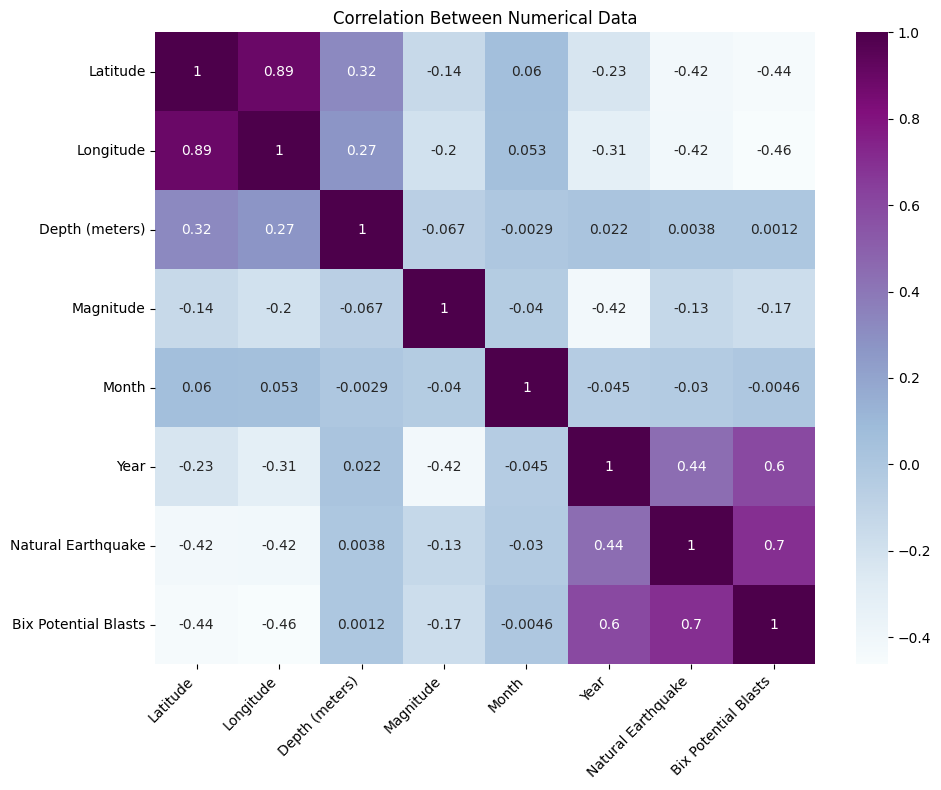

In [133]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(earthquake_df_corr, annot=True, cmap="BuPu")

plt.title("Correlation Between Numerical Data")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.savefig('..CorrelationBetweenNumericalData.png')
plt.show()


No apparent correlation between numerical data.

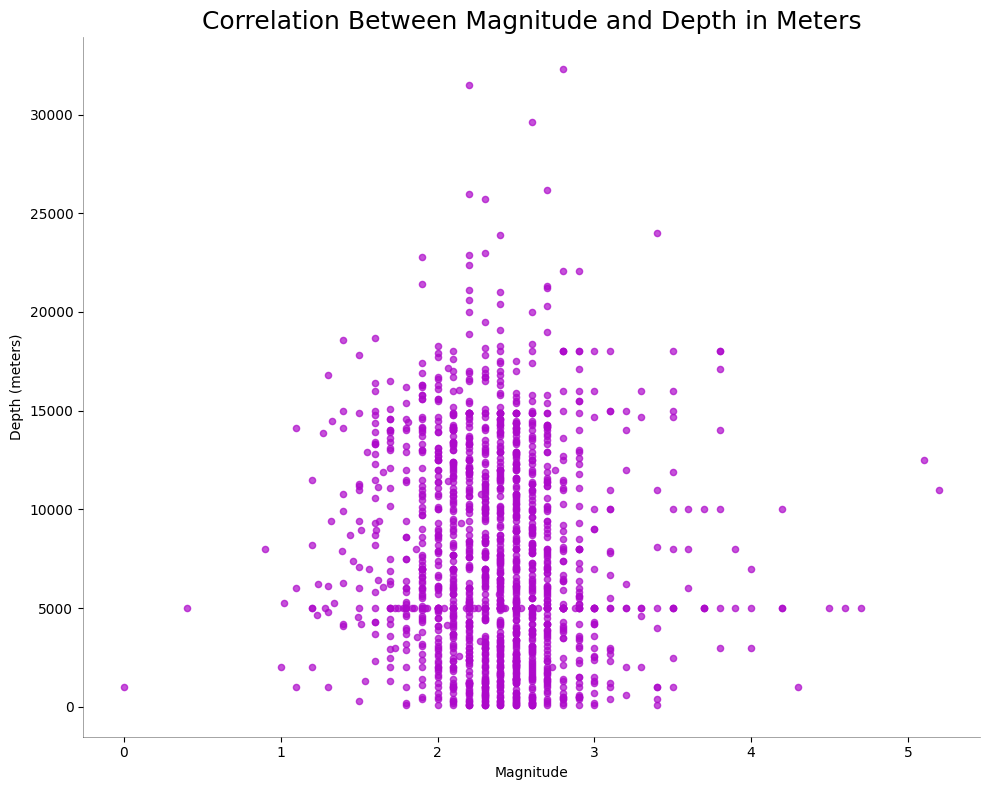

In [135]:
# Correlation Between Magnitude and Depth in Meters

plt.figure(figsize=(10,8))

plt.scatter(
    earthquake_df['Magnitude'],
    earthquake_df['Depth (meters)'],
    color = "#ad09ca",
    alpha = 0.7,
    s = 20
)

plt.xlabel('Magnitude')
plt.ylabel('Depth (meters)')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Correlation Between Magnitude and Depth in Meters', fontsize=18)

plt.tight_layout()
plt.savefig('CorrelationBetweenMagnitudeAndDepthInMeters')
plt.show()


Most earthquakes fall between a magnitude of 1.9 and 2.7 and are less than 15,000 meters deep.

In [136]:

unique_years = sorted(earthquake_df['Year'].unique().tolist())

unique_years

# Missing information for 1989
# Spans 1973 - 2015

[1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

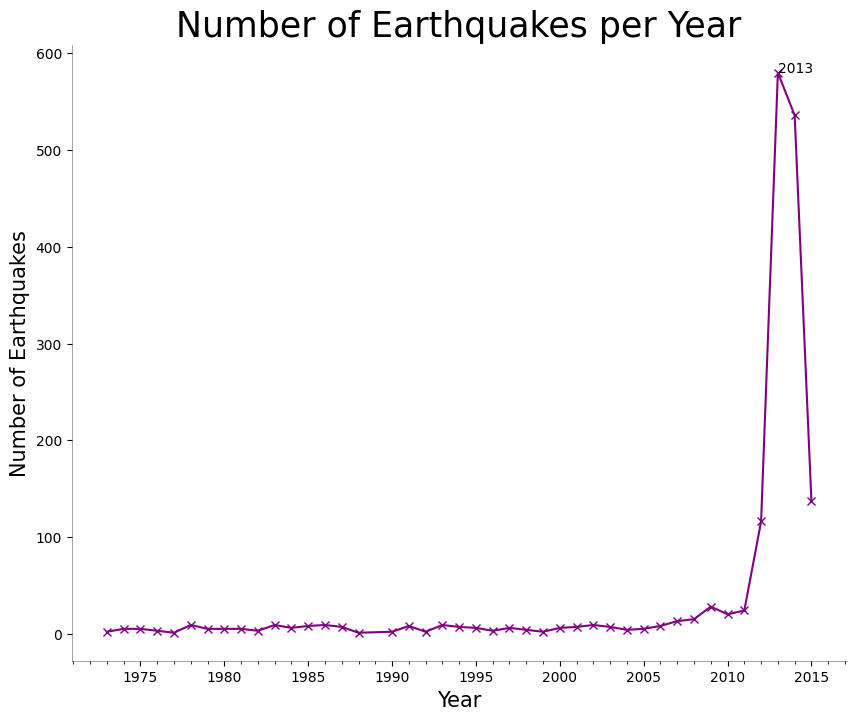

In [162]:
yearly_counts = earthquake_df.groupby('Year').size()

plt.figure(figsize =(10,8))

yearly_counts.plot(kind= "line", 
                   marker= "x",
                   color = "purple")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator())

ax.set_xlabel("Year",
              fontsize = 15)
ax.set_ylabel("Number of Earthquakes",
              fontsize = 15)
ax.set_title('Number of Earthquakes per Year',
             fontsize = 25)

highest_index = yearly_counts.idxmax()
x_coord = highest_index
y_coord = yearly_counts.loc[highest_index]
plt.text(x_coord,
         y_coord,
         '2013')

plt.savefig('..NumberOfEarthquakesPerYear.png')
plt.show()